In [78]:
# Based -> https://www.kaggle.com/code/manishabenschop/electrical-fault-analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn import metrics

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



<img src="https://www.elprocus.com/wp-content/uploads/2014/02/Copy-of-DSCN9922.jpg" width=800 />

# <font color = 'Fire'><center> <b>Electrical Faults Detection and Classsification</b> </center>

### What are Electrical Faults?
> Normally, a power system operates under balanced conditions. When the system becomes unbalanced due to the failures of insulation at any point or due to the contact of live wires, a short–circuit or fault, is said to occur in the line. Faults may occur in the power system due to the number of reasons like natural disturbances (lightning, high-speed winds, earthquakes), insulation breakdown, falling of a tree, bird shorting, etc.


### Types of Faults?
> Faults can be brodly categorised into two types:
> 1. Open-circuit Fault and
> 2. Short-Circuit Faults
    * Symmetrical and 
    * Asymmetrical Faults
    
### Symmetrical and Asymmetrical Faults
> #### Symmetrical 
> * In symmetrical faults, all phases are shorted to each other or to earth (L-L-L) or (L-L-L-G).
> * The nature of this type of fault is balanced.
> * In this type of fault,fault currents in all phases are symmetrical i.e. their magnitudes are equal and they are equally displaced by angle 120 degree.
> * It is more severe type of fault but it occurs rarely.

> #### Asymmetrical 
> * These faults involve only one or two phases.
> * In this type of fault, three phase lines become unbalanced.
> * There are mainly three types namely line to ground (L-G), line to line (L-L) and double line to ground (LL-G) faults.
> * These type of faults mostly occur on power system..





<center> <img src="https://ars.els-cdn.com/content/image/1-s2.0-S2314717217300065-gr1.jpg" width="600" height="200"> </center>
<br>
So here we are trying to classify Short-Circuit faults into further categories based on the values of line voltages and Line Currents.

In [21]:
ds = pd.read_csv("D:\Github\Electrical-Fault-detection-and-classification\Data\detect_dataset.csv")
cs = pd.read_csv("D:\Github\Electrical-Fault-detection-and-classification\Data\classData.csv")

ds.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [22]:
cs.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


#### So we have two files(datasets) here namely ds and cs:
* ds is for train the model to detect any type of Fault and<br>
* cs is for Classification of Shunt Faults.


**This file _ds_ contains the dataset to classify the types of fault.**<br>

> A,B,C are the 3-phases of the electrical system. Most of the Electricity transmission happens via 3-phase system,<br>
and hence **Ia** represents the current(I) in phase A, **Va** represents the Voltage(V) in phase A and so on for Phase A and B.

Inputs - [Ia,Ib,Ic,Va,Vb,Vc]<br>
Outputs - [G C B A]<br>

Examples :<br>
[0 0 0 0] - No Fault<br>
[1 0 0 1] - LG fault (Between Phase A and Gnd)<br>
[0 0 1 1] - LL fault (Between Phase A and Phase B)<br>
[1 0 1 1] - LLG Fault (Between Phases A,B and ground)<br>
[0 1 1 1] - LLL Fault(Between all three phases)<br>
[1 1 1 1] - LLLG fault( Three phase symmetrical fault)<br>

In [23]:
# DS
print(f"The Detect Dataset has {ds.shape[0]} rows and {ds.shape[1]} columns.")
# CS
print(f"The Dataset to be classified has {cs.shape[0]} rows and {cs.shape[1]} columns.")

The Detect Dataset has 12001 rows and 9 columns.
The Dataset to be classified has 7861 rows and 10 columns.


In [24]:
# Dropping the last 2 columns from ddtr dataset.
ds = ds.drop(ds[['Unnamed: 7', 'Unnamed: 8']],axis=1)
ds.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


### Lets have a quick look on data types and values of our dataset 

In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [26]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


We don't have any type of null values in our dataset.

In [27]:
ds.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [28]:
cs.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


If there is any confusion regarding the values of the Line voltages, then let me clarify it that they are most probably in p.u.<br>
i.e.<br>
> ## $V_{p.u.} = \frac{V}{V_{base}} $

In actual the power system consists of 4 generators of 11 × 10^3 V. so we can convert by multiplying them by $11000$ Volts provided they have taken 11k as their base.

.........too much of info!

In [29]:
print(f"Dataset Detect has {ds.duplicated().sum()} duplicate values.")
print(f"Dataset Classify has {cs.duplicated().sum()} duplicate values.")

Dataset Detect has 0 duplicate values.
Dataset Classify has 0 duplicate values.


Output (S)
0    6505
1    5496
Name: count, dtype: int64 



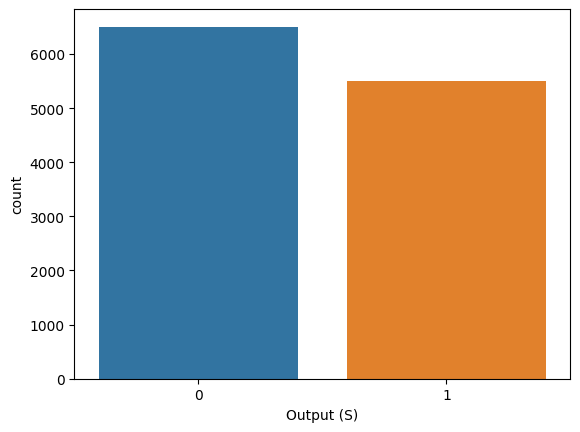

In [30]:
print(ds['Output (S)'].value_counts(),"\n")
sns.countplot(x=ds['Output (S)'])
plt.show()

We have a balanced dataset.

In [31]:
ds.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

#### We can observe that:
* Normally the Line current varies from **-100 to 100 Amp** and Voltage p.u. between **-0.6 and 0.6**.
* While during fault, we notice some absurd and random behaviour and the value of Line current even touches **-/+800 Amp** mark.

## Classification Dataset

In [33]:
cs['fault_types'] = cs['G'].astype('str') + cs['C'].astype('str') + cs['B'].astype('str') + cs['A'].astype('str')
cs.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_types
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


[G C B A]
[0 0 0 0] -> No fault 
[1 0 0 1] -> LG fault
[0 1 1 0] -> LL fault
[1 0 1 1] -> LLG Fault
[0 1 1 1] -> LLL Fault
[1 1 1 1] -> LLLG fault



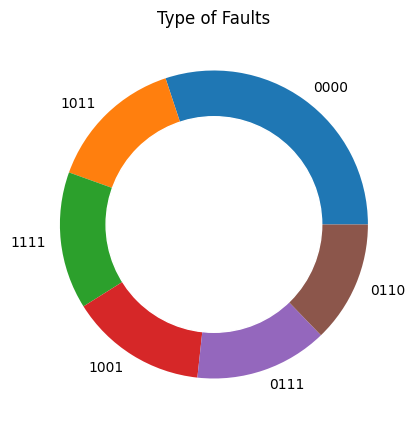

In [34]:
print("[G C B A]\n[0 0 0 0] -> No fault \n[1 0 0 1] -> LG fault\n[0 1 1 0] -> LL fault\n[1 0 1 1] -> LLG Fault\n[0 1 1 1] -> LLL Fault\n[1 1 1 1] -> LLLG fault\n")
plt.figure(figsize=(8,5))
cs.fault_types.value_counts().plot.pie()
#add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.gca().add_artist(my_circle)
plt.title("Type of Faults")
plt.ylabel("")
plt.show()

In [35]:
NF = cs[cs['fault_types']=='0000']
LG = cs[cs['fault_types']=='1001'] 
LL = cs[cs['fault_types']=='0110'] 
LLG = cs[cs['fault_types']=='1011'] 
LLL = cs[cs['fault_types']=='0111'] 
LLLG = cs[cs['fault_types']=='1111']

In [79]:
cs

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_types
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


In [85]:
dop =cs.iloc[:,10]

In [82]:
dip = cs.drop(columns=['G','C','B','A','fault_types'],axis=1)
dipc = dip.columns

mms = MinMaxScaler()
df_dip = mms.fit_transform(dip)

dip = pd.DataFrame(df_dip, columns=dipc)

In [83]:
dip

,Ia,Ib,Ic,Va,Vb,Vc
0,0.413869,0.497571,0.543058,0.839985,0.384404,0.284358
1,0.309366,0.460370,0.505251,0.767607,0.391930,0.349258
2,0.215144,0.405429,0.449635,0.728956,0.399481,0.380317
3,0.163683,0.381381,0.424998,0.704108,0.407055,0.397513
4,0.135580,0.377775,0.420857,0.682749,0.414650,0.411189
...,...,...,...,...,...,...
7856,0.461942,0.524456,0.508940,0.588089,0.045309,0.882445
7857,0.462161,0.523902,0.509278,0.595783,0.042747,0.877341
7858,0.462389,0.523347,0.509609,0.603454,0.040299,0.872144
7859,0.462624,0.522792,0.509933,0.611100,0.037966,0.866856


In [86]:
X_train, X_test, y_train, y_test = train_test_split(dip, dop, test_size=0.25, random_state=67)

### SVM model

In [2]:
sv = SVC(C=1000,kernel='rbf',gamma=1, degree=2)

sv.fit(X_train,y_train)
scores = cross_val_score(sv, X_test, y_test, cv=10)
print("Score:", np.mean(scores))
y_pred = sv.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)


NameError: name 'SVC' is not defined

[G C B A]
[0 0 0 0] -> No fault 
[1 0 0 1] -> LG fault
[0 1 1 0] -> LL fault
[1 0 1 1] -> LLG Fault
[0 1 1 1] -> LLL Fault
[1 1 1 1] -> LLLG fault

### Logistic regresion

In [91]:
model = LogisticRegression(solver='saga',penalty='l1', C=6)  # 'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],  'solver': ['liblinear', 'saga']  

model.fit(X_train,y_train)
scores = cross_val_score(model, X_test, y_test, cv=10)
print("Score:", np.mean(scores))
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

Score: 0.40795607583134774
Matriz de confusión:
 [[596   0   0   0   0   0]
 [220   0   0   0   0  27]
 [233   0   0   0   0  39]
 [300   0   0   0   0   0]
 [283   0   0   0   0   0]
 [241   0   0   0   0  27]]


## Detection dataset

In [44]:
for i in ['Va','Vb','Vc']:
    ds[i] = ds[i]*11000
    
ds.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,599.390044,-7259.130241,6659.740208
1,0,-122.235754,6.168667,116.067087,1122.000000,-6914.727017,5788.217479
2,0,-90.161474,3.813632,86.347841,1551.280808,-6658.045449,5106.764641
3,0,-79.904916,2.398803,77.506112,1718.997027,-6624.588641,4905.591614
4,0,-63.885255,0.590667,63.294587,1984.966313,-6506.515664,4521.549351


In [45]:
dip = ds.drop(columns=['Output (S)'],axis=1)
dipc = dip.columns

mms = MinMaxScaler()
df_dip = mms.fit_transform(dip)

dip = pd.DataFrame(df_dip, columns=dipc)

In [75]:
dop = ds.iloc[:,0]

In [47]:
dip.describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.503171,0.488143,0.507506,0.512969,0.500408,0.505908
std,0.213170,0.199653,0.169252,0.281340,0.277718,0.286065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.463009,0.474255,0.464407,0.311339,0.268831,0.273359
50%,0.497548,0.505608,0.494757,0.506426,0.506857,0.508694
75%,0.529800,0.541872,0.520349,0.736078,0.705548,0.739087
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [49]:
X_train, X_test, y_train, y_test = train_test_split(dip, dop, test_size=0.25, random_state=67)

### SVM model

In [57]:
sv = SVC(C=1000)

sv.fit(X_train,y_train)
scores = cross_val_score(sv, X_test, y_test, cv=10)
print("Score:", np.mean(scores))
y_pred = sv.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)



Score: 0.9969999999999999
Matriz de confusión:
 [[1637    5]
 [   0 1359]]


### Logistic regresion

In [74]:
model = LogisticRegression(solver='saga',penalty='l2', C=0.4)  # 'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],  'solver': ['liblinear', 'saga']  

model.fit(X_train,y_train)
scores = cross_val_score(model, X_test, y_test, cv=10)
print("Score:", np.mean(scores))
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)


Score: 0.7137685492801772
Matriz de confusión:
 [[1642    0]
 [ 844  515]]
